In [101]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time

In [102]:
time1 = time.time()   # to measure time taken
data = []
labels = []
labelfile = open('train/labels.txt', 'r')
Lines = labelfile.readlines()

for j in range(2000):
    if(os.path.isfile(f'save_images/{j}_1.png')):
        labels.extend(Lines[j].strip().split(','))
        for i in range(3):    
            image = cv2.imread(f'save_images/{j}_{i+1}.png')
            data.append(image)
print(f'{len(labels)} labels loaded')
print(f'{len(data)} images loaded')
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

5991 labels loaded
5991 images loaded
Time taken: 7.3 seconds


In [103]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=random.randint(0, 1000))

In [104]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = lb.transform(testY)         # transform = perform the one-hot encoding (unique class labels already found)

In [105]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(24, activation='softmax'))

In [106]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.08
EPOCHS = 10
# compile the model using SGD as our optimizer and categorical cross-entropy loss
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
# opt2 = Adam(learning_rate=0.003)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


/Users/snehilsrivastava/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [107]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 
# Larger GPUs would be able to accommodate larger batch sizes (eg. 64)
time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/10


2022-11-26 20:24:08.853673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - ETA: 0s - loss: 2.5263 - accuracy: 0.4679

2022-11-26 20:24:18.634761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 11s 70ms/step - loss: 2.5263 - accuracy: 0.4679 - val_loss: 2.0858 - val_accuracy: 0.7473
Epoch 2/10
150/150 [==============================] - 9s 63ms/step - loss: 1.7495 - accuracy: 0.8662 - val_loss: 1.5791 - val_accuracy: 0.8974
Epoch 3/10
150/150 [==============================] - 10s 64ms/step - loss: 1.3162 - accuracy: 0.9240 - val_loss: 1.1556 - val_accuracy: 0.9425
Epoch 4/10
150/150 [==============================] - 10s 65ms/step - loss: 1.0071 - accuracy: 0.9491 - val_loss: 0.9913 - val_accuracy: 0.9316
Epoch 5/10
150/150 [==============================] - 10s 65ms/step - loss: 0.7940 - accuracy: 0.9568 - val_loss: 0.7570 - val_accuracy: 0.9550
Epoch 6/10
150/150 [==============================] - 10s 68ms/step - loss: 0.6369 - accuracy: 0.9662 - val_loss: 0.7720 - val_accuracy: 0.9274
Epoch 7/10
150/150 [==============================] - 10s 69ms/step - loss: 0.5331 - accuracy: 0.9683 - val_loss: 0.5640 - val_accuracy: 0.9583
Epoc

In [108]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
 5/38 [==>...........................] - ETA: 0s

2022-11-26 20:25:50.069369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

       ALPHA       0.96      0.93      0.95        46
        BETA       0.99      0.99      0.99        67
         CHI       0.98      0.93      0.95        44
       DELTA       0.96      0.91      0.93        55
     EPSILON       0.94      1.00      0.97        46
         ETA       0.96      0.96      0.96        45
       GAMMA       0.98      0.94      0.96        53
        IOTA       0.96      0.94      0.95        52
       KAPPA       0.95      1.00      0.97        39
       LAMDA       1.00      0.90      0.95        41
          MU       0.91      0.93      0.92        44
          NU       0.96      0.98      0.97        48
       OMEGA       0.93      0.93      0.93        45
     OMICRON       0.99      0.94      0.96        72
         PHI       1.00      0.93      0.97        46
          PI       0.94      0.94      0.94        50
         PSI       0.98    

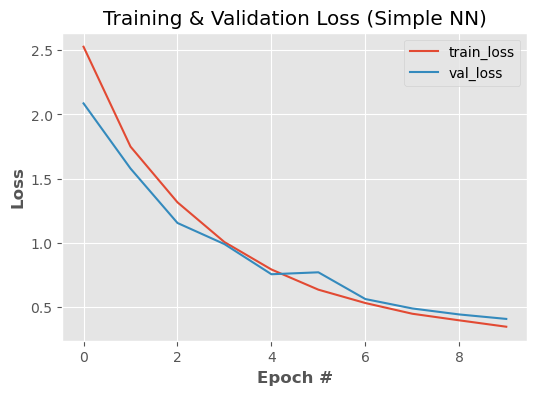

In [109]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [6,4])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

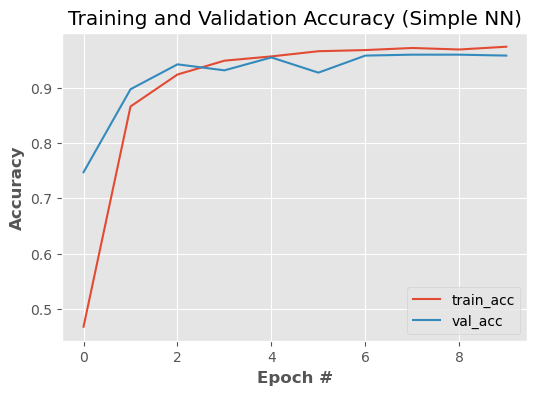

In [110]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [6,4])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 135, 159, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 67, 79, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 65, 77, 4)         580       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 38, 4)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4864)              0         
                                                                 
 dense_16 (Dense)            (None, 12)               

In [112]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('simple_NN_model.h5')
f = open('simple_NN_label_bin', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
